In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
import warnings

In [6]:
warnings.filterwarnings("ignore")

In [8]:
dfcrd=pd.read_csv(R"C:\Users\ny691\OneDrive\Desktop\DATA SCIENCE NOTES\DATASETS\DATASETS\DATASETS\Outlier Detection Dataset\Adaboost\creditcard.csv")

In [9]:
dfcrd

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [10]:
dfcrd.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [18]:
dfcrd.drop("Time",axis=1,inplace=True)

In [19]:
dfcrd

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


### Nan checking

In [20]:
dfcrd.isna().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [22]:
dfcrd.dtypes

V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

### Error Detectioon

<AxesSubplot:>

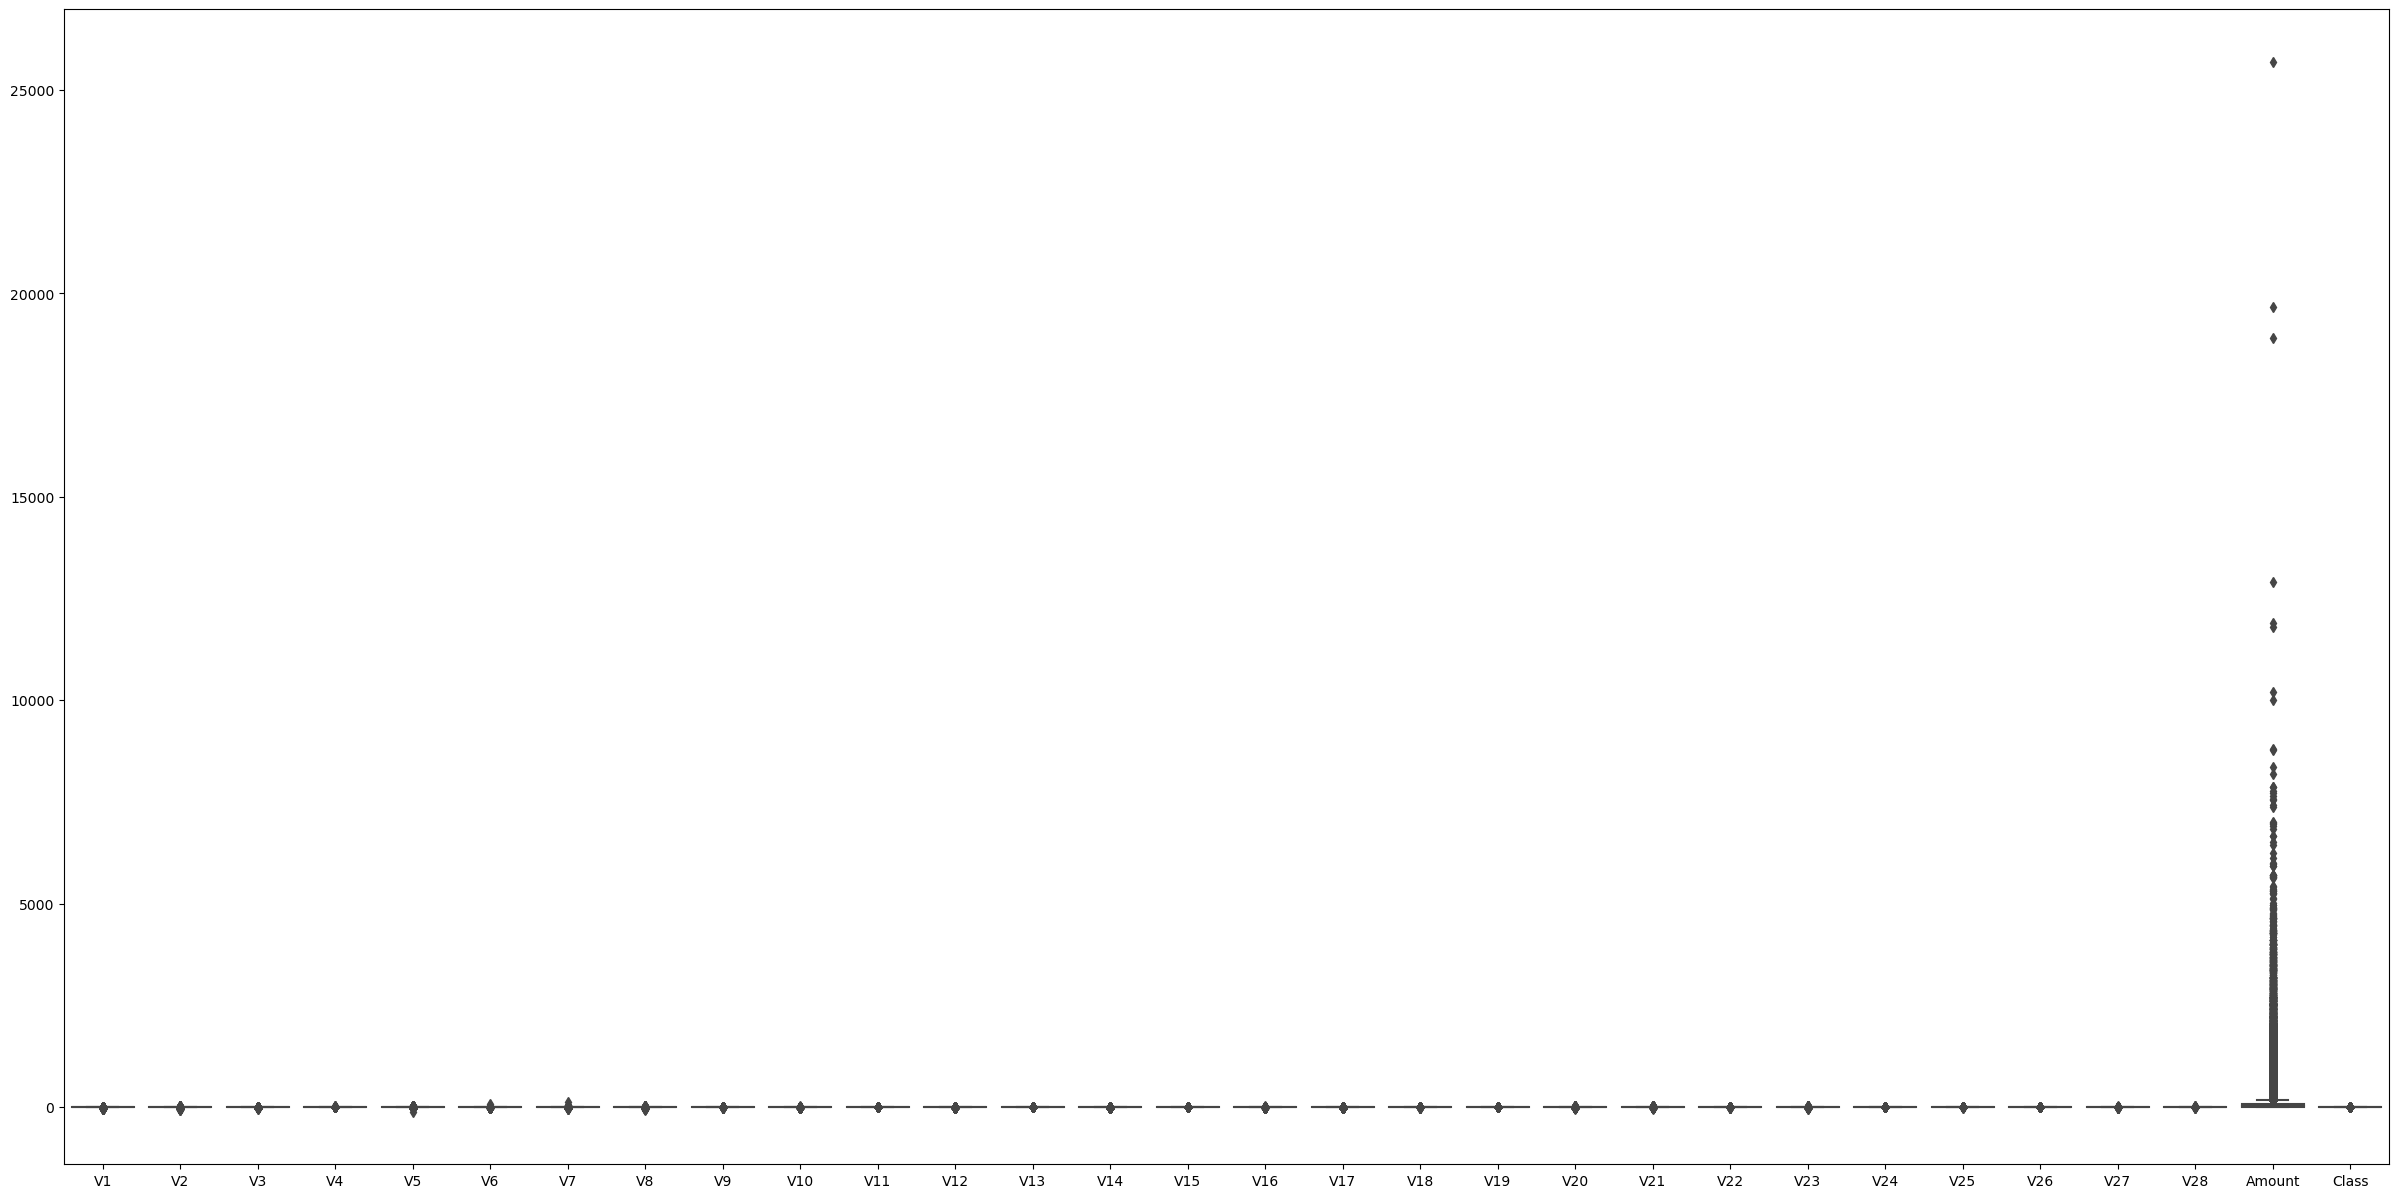

In [24]:
plt.figure(figsize=(30,15))
sns.boxplot(data=dfcrd)

In [25]:
inl=dfcrd.drop("Class",axis=1).columns

In [26]:
inl

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

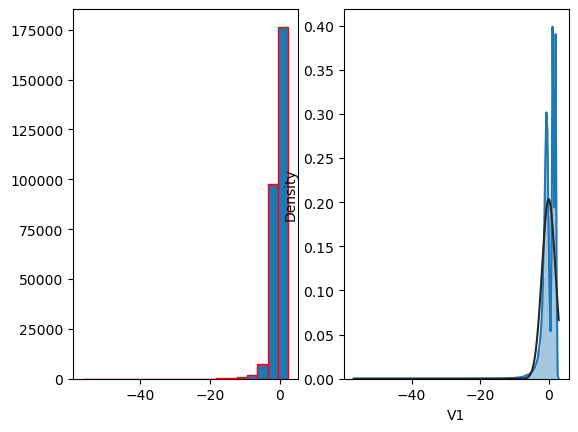

-3.2806673027560405
It is a skew distribution ==> IQR method
lower limit : -4.274396001792603
upper limit : 4.669664311280146
Revalidation Errors
Empty DataFrame
Columns: [V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Amount, Class]
Index: []

[0 rows x 30 columns]


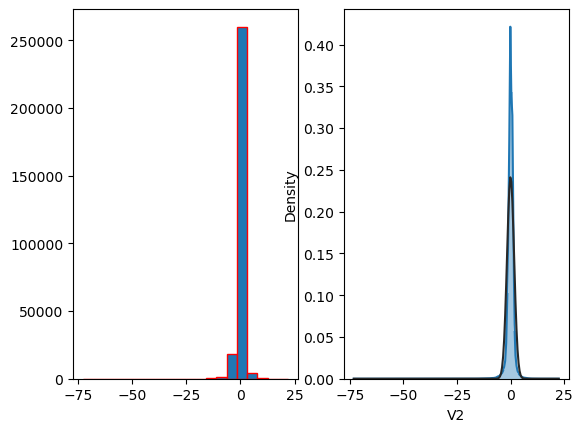

-4.624865573285336
It is a skew distribution ==> IQR method
lower limit : -2.7019605905224315
upper limit : 2.90713454829761
Revalidation Errors
Empty DataFrame
Columns: [V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Amount, Class]
Index: []

[0 rows x 30 columns]


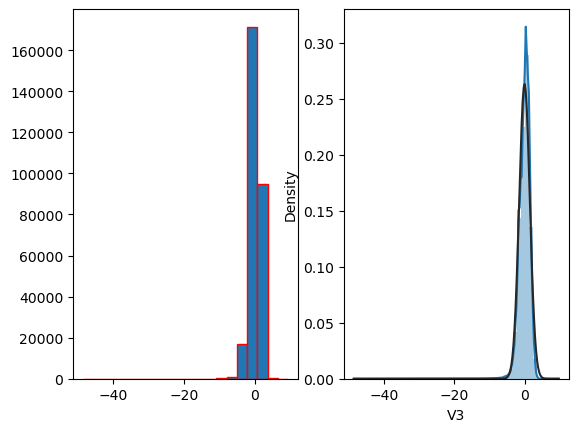

-2.2401554402404193
It is a skew distribution ==> IQR method
lower limit : -3.7667054090861836
upper limit : 3.9035361133965982
Revalidation Errors
Empty DataFrame
Columns: [V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Amount, Class]
Index: []

[0 rows x 30 columns]


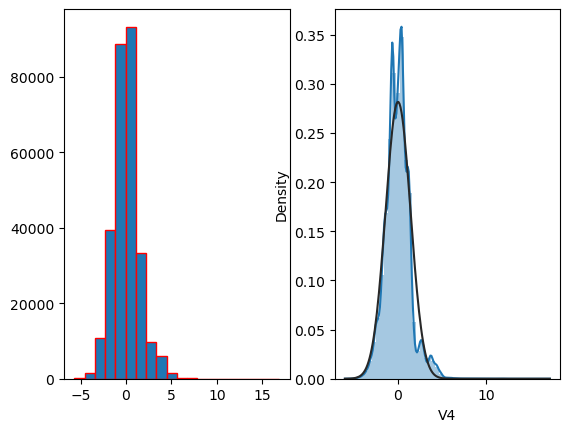

0.676292097985747
It is a skew distribution ==> IQR method
lower limit : -3.236612225031064
upper limit : 3.1313133981683787
Revalidation Errors
Empty DataFrame
Columns: [V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Amount, Class]
Index: []

[0 rows x 30 columns]


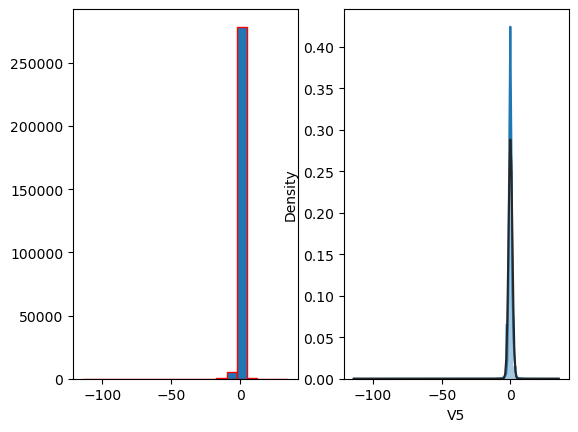

-2.425901495952054
It is a skew distribution ==> IQR method
lower limit : -2.646882336821933
upper limit : 2.5672117056694685
Revalidation Errors
Empty DataFrame
Columns: [V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Amount, Class]
Index: []

[0 rows x 30 columns]


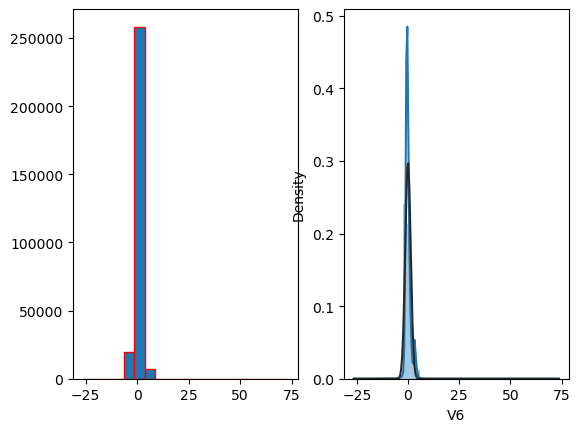

1.826580664998085
It is a skew distribution ==> IQR method
lower limit : -2.51858636568538
upper limit : 2.148855653580996
Revalidation Errors
Empty DataFrame
Columns: [V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Amount, Class]
Index: []

[0 rows x 30 columns]


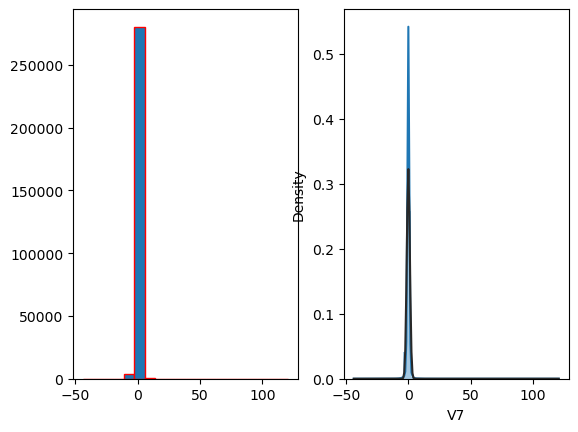

2.553907417429514
It is a skew distribution ==> IQR method
lower limit : -2.240843806907704
upper limit : 2.2572040007487804
Revalidation Errors
Empty DataFrame
Columns: [V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Amount, Class]
Index: []

[0 rows x 30 columns]


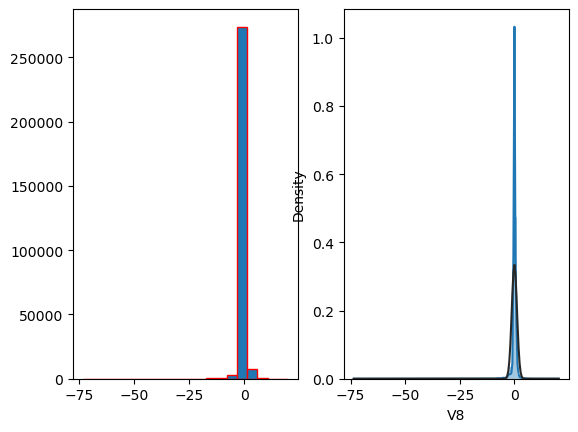

-8.521944194777976
It is a skew distribution ==> IQR method
lower limit : -1.0125931529838397
upper limit : 1.1313092708678223
Revalidation Errors
Empty DataFrame
Columns: [V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Amount, Class]
Index: []

[0 rows x 30 columns]


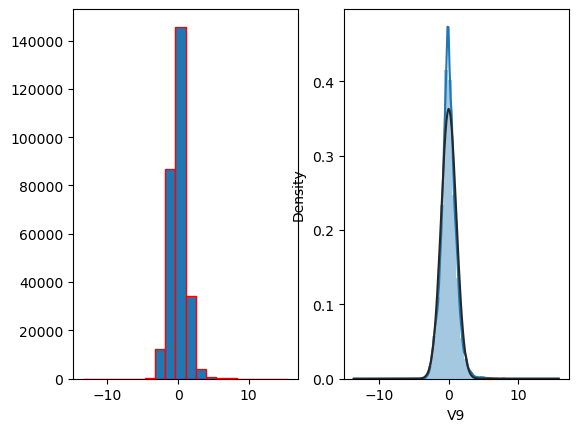

0.5546797719063509
It is a skew distribution ==> IQR method
lower limit : -2.503452471089882
upper limit : 2.457493931105559
Revalidation Errors
Empty DataFrame
Columns: [V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Amount, Class]
Index: []

[0 rows x 30 columns]


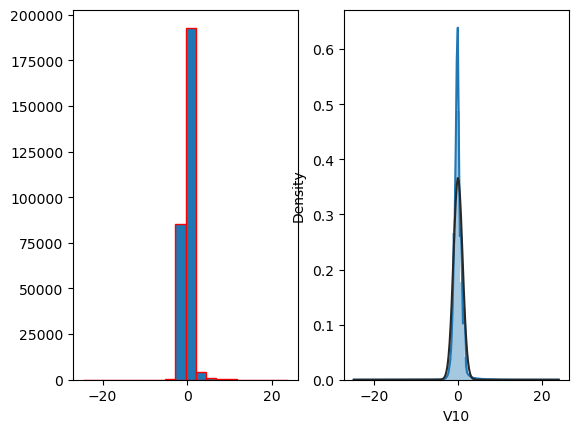

1.1871405899625278
It is a skew distribution ==> IQR method
lower limit : -2.0194494839425694
upper limit : 1.9379472025887527
Revalidation Errors
Empty DataFrame
Columns: [V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Amount, Class]
Index: []

[0 rows x 30 columns]


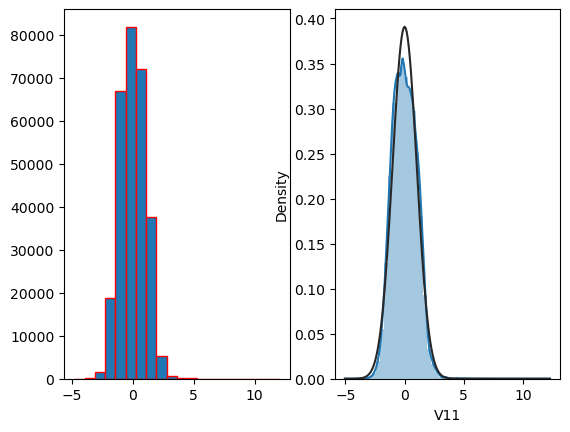

0.35650585548882013
It is a Normal distribution ==> Mean std method
count    2.848070e+05
mean     9.289524e-16
std      1.020713e+00
min     -4.797473e+00
25%     -7.624942e-01
50%     -3.275735e-02
75%      7.395934e-01
max      1.201891e+01
Name: V11, dtype: float64
lower limit : -3.062139083134656
upper limit : 3.062139083134658
Revalidation Errors 
Empty DataFrame
Columns: [V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Amount, Class]
Index: []

[0 rows x 30 columns]


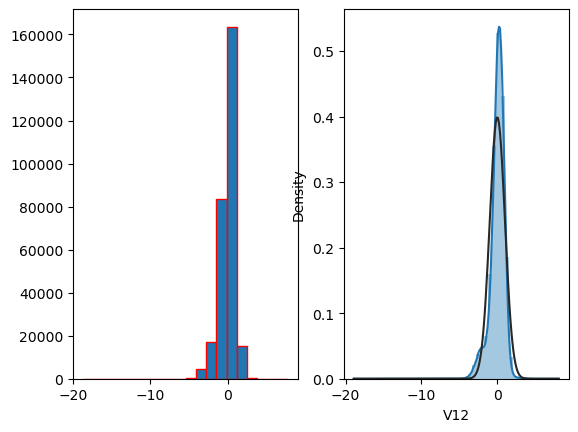

-2.278400935410618
It is a skew distribution ==> IQR method
lower limit : -1.941285763020238
upper limit : 2.1539523105259604
Revalidation Errors
Empty DataFrame
Columns: [V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Amount, Class]
Index: []

[0 rows x 30 columns]


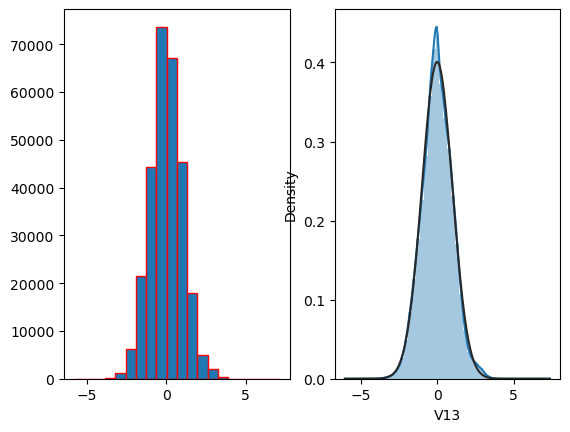

0.06523345790658323
It is a Normal distribution ==> Mean std method
count    2.848070e+05
mean     1.674888e-15
std      9.952742e-01
min     -5.791881e+00
25%     -6.485393e-01
50%     -1.356806e-02
75%      6.625050e-01
max      7.126883e+00
Name: V13, dtype: float64
lower limit : -2.9858226903754446
upper limit : 2.985822690375448
Revalidation Errors 
Empty DataFrame
Columns: [V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Amount, Class]
Index: []

[0 rows x 30 columns]


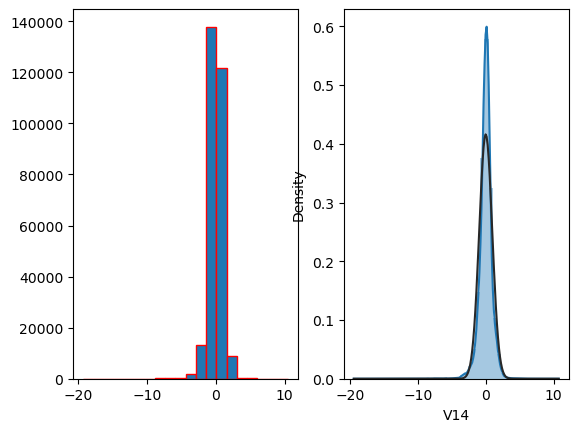

-1.9951758402683304
It is a skew distribution ==> IQR method
lower limit : -1.803659804964707
upper limit : 1.8712356417278626
Revalidation Errors
Empty DataFrame
Columns: [V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Amount, Class]
Index: []

[0 rows x 30 columns]


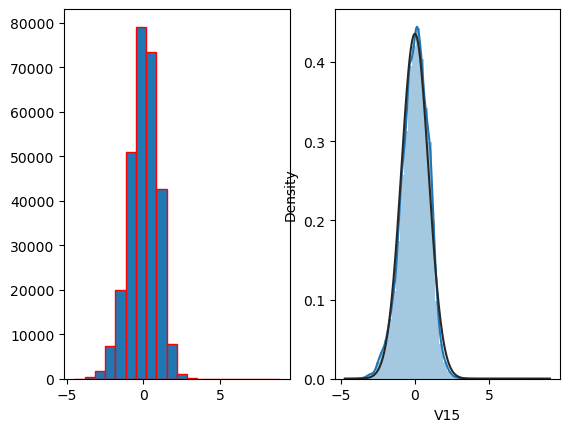

-0.3084229821359239
It is a Normal distribution ==> Mean std method
count    2.848070e+05
mean     3.501098e-15
std      9.153160e-01
min     -4.498945e+00
25%     -5.828843e-01
50%      4.807155e-02
75%      6.488208e-01
max      8.877742e+00
Name: V15, dtype: float64
lower limit : -2.745948034831285
upper limit : 2.745948034831292
Revalidation Errors 
Empty DataFrame
Columns: [V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Amount, Class]
Index: []

[0 rows x 30 columns]


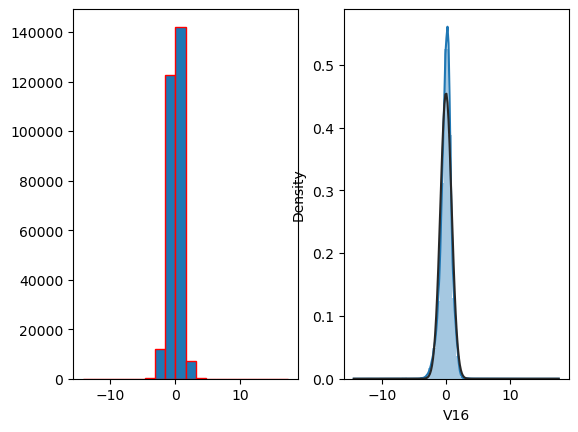

-1.100966276051066
It is a skew distribution ==> IQR method
lower limit : -1.955036385495261
upper limit : 2.010295931257707
Revalidation Errors
Empty DataFrame
Columns: [V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Amount, Class]
Index: []

[0 rows x 30 columns]


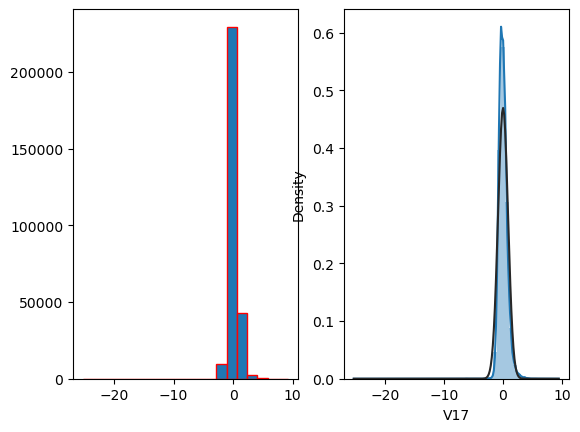

-3.8449144738706202
It is a skew distribution ==> IQR method
lower limit : -1.8088832582431966
upper limit : 1.7248099271865331
Revalidation Errors
Empty DataFrame
Columns: [V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Amount, Class]
Index: []

[0 rows x 30 columns]


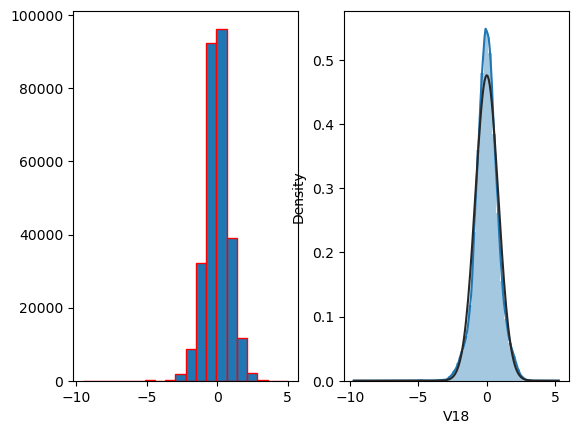

-0.25988026809430603
It is a Normal distribution ==> Mean std method
count    2.848070e+05
mean     4.258754e-16
std      8.381762e-01
min     -9.498746e+00
25%     -4.988498e-01
50%     -3.636312e-03
75%      5.008067e-01
max      5.041069e+00
Name: V18, dtype: float64
lower limit : -2.51452862858651
upper limit : 2.5145286285865107
Revalidation Errors 
Empty DataFrame
Columns: [V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Amount, Class]
Index: []

[0 rows x 30 columns]


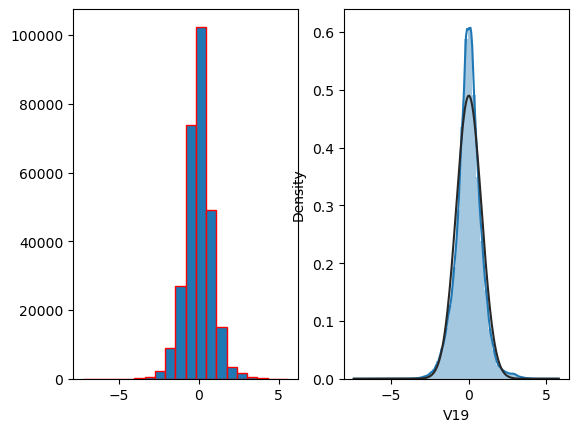

0.10919175998147104
It is a Normal distribution ==> Mean std method
count    2.848070e+05
mean     9.019919e-16
std      8.140405e-01
min     -7.213527e+00
25%     -4.562989e-01
50%      3.734823e-03
75%      4.589494e-01
max      5.591971e+00
Name: V19, dtype: float64
lower limit : -2.4421215023057186
upper limit : 2.4421215023057203
Revalidation Errors 
Empty DataFrame
Columns: [V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Amount, Class]
Index: []

[0 rows x 30 columns]


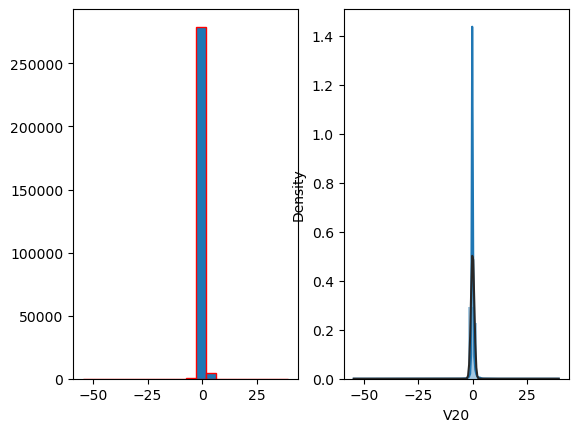

-2.037155299081399
It is a skew distribution ==> IQR method
lower limit : -0.7288646731770594
upper limit : 0.6501841494971068
Revalidation Errors
Empty DataFrame
Columns: [V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Amount, Class]
Index: []

[0 rows x 30 columns]


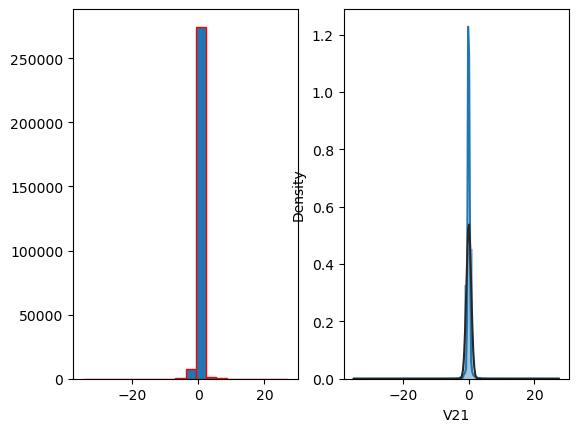

3.5929911930778453
It is a skew distribution ==> IQR method
lower limit : -0.8505531720141558
upper limit : 0.8085354286142143
Revalidation Errors
Empty DataFrame
Columns: [V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Amount, Class]
Index: []

[0 rows x 30 columns]


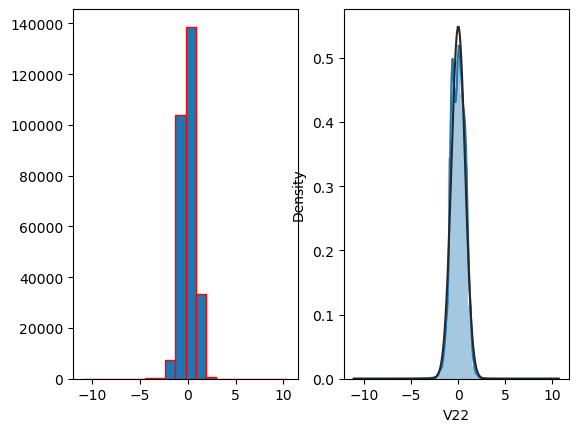

-0.21325762284328822
It is a Normal distribution ==> Mean std method
count    2.848070e+05
mean     8.042109e-16
std      7.257016e-01
min     -1.093314e+01
25%     -5.423504e-01
50%      6.781943e-03
75%      5.285536e-01
max      1.050309e+01
Name: V22, dtype: float64
lower limit : -2.17710468132275
upper limit : 2.177104681322752
Revalidation Errors 
Empty DataFrame
Columns: [V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Amount, Class]
Index: []

[0 rows x 30 columns]


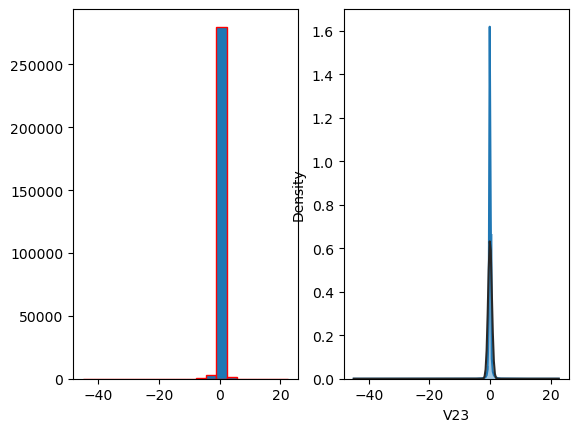

-5.875140340106818
It is a skew distribution ==> IQR method
lower limit : -0.6260789583212862
upper limit : 0.6118746771624517
Revalidation Errors
Empty DataFrame
Columns: [V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Amount, Class]
Index: []

[0 rows x 30 columns]


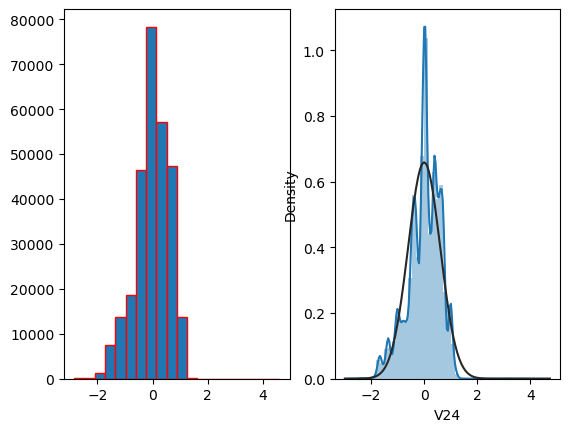

-0.5524993011673045
It is a skew distribution ==> IQR method
lower limit : -1.5457552412760254
upper limit : 1.630695705034713
Revalidation Errors
Empty DataFrame
Columns: [V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Amount, Class]
Index: []

[0 rows x 30 columns]


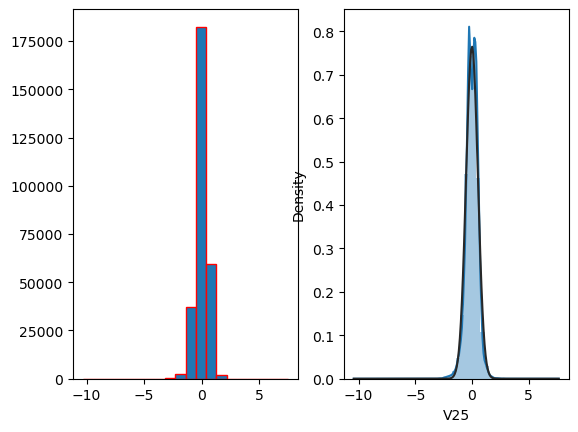

-0.4157925903156351
It is a Normal distribution ==> Mean std method
count    2.848070e+05
mean     1.426896e-15
std      5.212781e-01
min     -1.029540e+01
25%     -3.171451e-01
50%      1.659350e-02
75%      3.507156e-01
max      7.519589e+00
Name: V25, dtype: float64
lower limit : -1.5638342116228126
upper limit : 1.5638342116228152
Revalidation Errors 
Empty DataFrame
Columns: [V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Amount, Class]
Index: []

[0 rows x 30 columns]


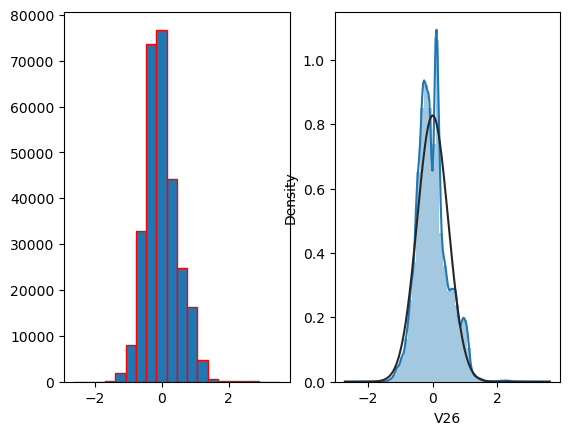

0.5766926172084218
It is a skew distribution ==> IQR method
lower limit : -1.178888075273932
upper limit : 1.092856323107968
Revalidation Errors
Empty DataFrame
Columns: [V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Amount, Class]
Index: []

[0 rows x 30 columns]


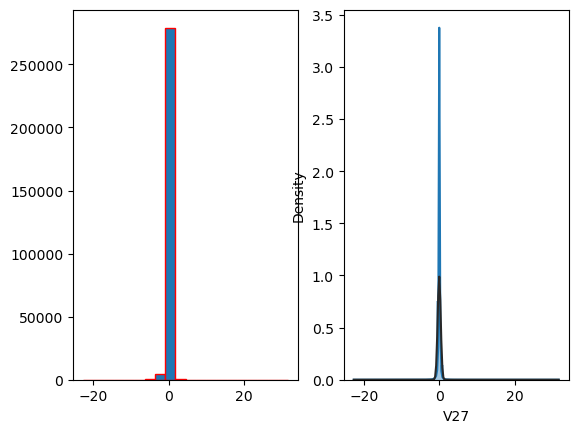

-1.1702089424327133
It is a skew distribution ==> IQR method
lower limit : -0.3136665027898834
upper limit : 0.333872093171221
Revalidation Errors
Empty DataFrame
Columns: [V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Amount, Class]
Index: []

[0 rows x 30 columns]


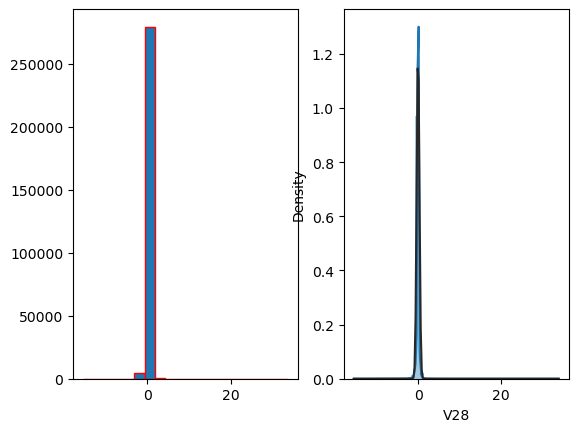

11.19209119221281
It is a skew distribution ==> IQR method
lower limit : -0.24981941467918245
upper limit : 0.27513957642002174
Revalidation Errors
Empty DataFrame
Columns: [V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Amount, Class]
Index: []

[0 rows x 30 columns]


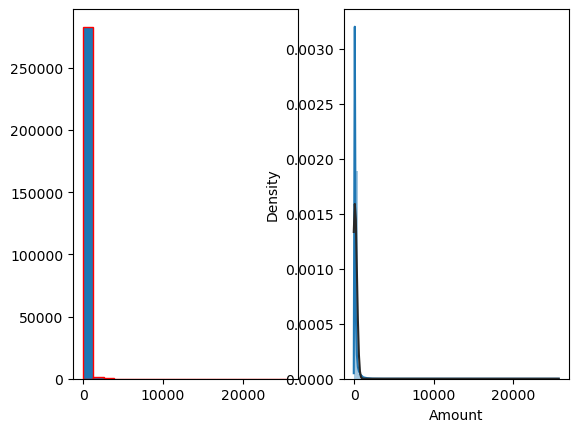

16.977724453761024
It is a skew distribution ==> IQR method
lower limit : -101.7475
upper limit : 184.5125
Revalidation Errors
Empty DataFrame
Columns: [V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Amount, Class]
Index: []

[0 rows x 30 columns]


In [33]:
from scipy.stats import norm
for i in inl:
    plt.subplot(1,2,1)
    plt.hist(dfcrd[i],ec="r",bins=20)
    plt.subplot(1,2,2)
    sns.distplot(dfcrd[i],fit=norm)
    plt.show()
    print(dfcrd[i].skew())
    if dfcrd[i].skew().round()==0:
        print("It is a Normal distribution ==> Mean std method")
        print(dfcrd[i].describe())
        m=dfcrd[i].mean()
        std=dfcrd[i].std()
        lower=m-(3*std)
        upper=m+(3*std)
        print("lower limit :",lower)
        print("upper limit :",upper)
        if dfcrd[i][(dfcrd[i]<lower) | (dfcrd[i]>upper)].count()==0:
            print("No Errors are There")
        else:
            dfcrd[i]=dfcrd[i].map(lambda d : m if d<lower else m if d>upper else d)
            print("Revalidation Errors ")
            print(dfcrd[(dfcrd[i]<lower) | (dfcrd[i]>upper)])
    else:
        print("It is a skew distribution ==> IQR method")
        q1=dfcrd[i].quantile(0.25)
        q3=dfcrd[i].quantile(0.75)
        Iqr=q3-q1
        lower1=q1-(1.5*Iqr)
        upper1=q3+(1.5*Iqr)
        print("lower limit :",lower1)
        print("upper limit :",upper1)
        if dfcrd[i][(dfcrd[i]<lower1) | (dfcrd[i]>upper1)].count==0:
            print("No Erros are There")
        else:
            dfcrd[i]=dfcrd[i].map(lambda e : lower1 if e<lower1 else upper1 if e>upper1 else e )
            print("Revalidation Errors")
            print(dfcrd[(dfcrd[i]<lower1) | (dfcrd[i]>upper1)])
        

In [34]:
dfcrd["Class"]

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

<AxesSubplot:>

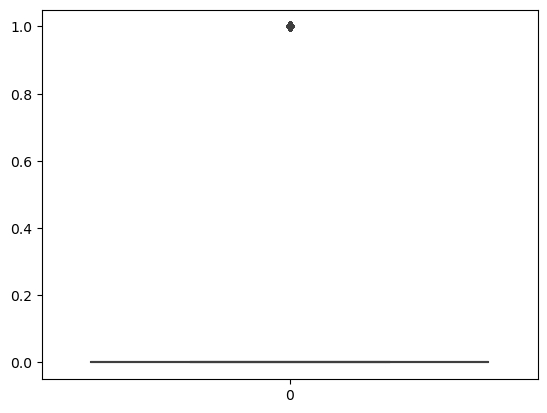

In [35]:
sns.boxplot(data=dfcrd["Class"])

In [37]:
dfcrd["Class"].skew()

23.99757931064749

In [38]:
q1=dfcrd["Class"].quantile(0.25)
q3=dfcrd["Class"].quantile(0.75)
Iqr=q3-q1          
lower1=q1-(1.5*Iqr)
upper1=q3+(1.5*Iqr)

In [44]:
upper1

0.0

In [45]:
lower1

0.0

In [42]:
dfcrd[dfcrd["Class"]<lower1]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


In [43]:
dfcrd[dfcrd["Class"]>upper1]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,-2.312227,1.951992,-1.609851,3.131313,-0.522188,-1.426545,-2.240844,1.131309,-2.503452,-2.019449,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.0000,1
623,-3.043541,-2.701961,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.661696,0.435477,0.611875,-0.293803,0.279798,-0.145362,-0.252773,0.035764,184.5125,1
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,184.5125,1
6108,-4.274396,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-2.240844,-0.248778,-0.247768,-2.019449,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.313667,0.275140,59.0000,1
6329,1.234235,2.907135,-3.766705,3.131313,2.567212,-1.357746,1.713445,-0.496358,-1.282858,-2.019449,...,-0.379068,-0.704181,-0.626079,-1.545755,1.488901,0.566797,-0.010016,0.146793,1.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,-1.927883,1.125653,-3.766705,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-2.019449,...,0.778584,-0.319189,0.611875,-0.294885,0.537503,0.788395,0.292680,0.147968,184.5125,1
280143,1.378559,1.289381,-3.766705,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-2.019449,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.333872,0.186637,0.7600,1
280149,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.131309,-0.652250,-2.019449,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.333872,0.194361,77.8900,1
281144,-3.113832,0.585864,-3.766705,1.817092,-0.840618,-2.518586,-2.208002,1.058733,-1.632333,-2.019449,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.333872,-0.249819,184.5125,1


### Data Separation

In [47]:
x=dfcrd.drop("Class",axis=1)

In [48]:
x

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.6200
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.6900
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.611875,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,184.5125
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.5000
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.9900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-4.274396,2.907135,-3.766705,-2.066656,-2.646882,-2.518586,-2.240844,1.131309,1.914428,1.937947,...,0.650184,0.213454,0.111864,0.611875,-0.509348,1.436807,0.250034,0.333872,0.275140,0.7700
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.7900
284804,1.919565,-0.301254,-3.249640,-0.557828,2.567212,2.148856,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.8800
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.0000


In [49]:
x.shape


(284807, 29)

In [50]:
y=dfcrd["Class"]

In [51]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [52]:
y.shape

(284807,)

###    ### imbalance

In [53]:
y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

<AxesSubplot:>

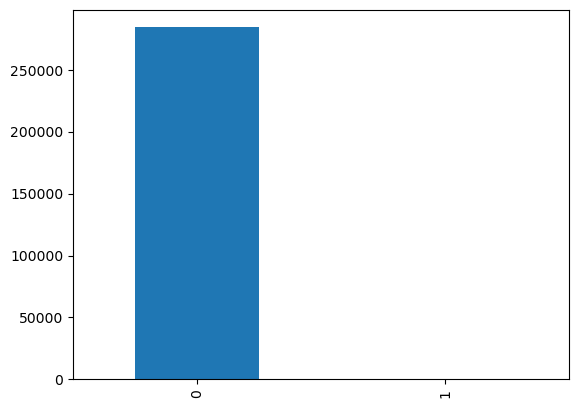

In [54]:
y.value_counts().plot(kind="bar")

In [55]:
from imblearn.over_sampling import SMOTE

In [56]:
smt=SMOTE()

In [58]:
x_ros,y_ros=smt.fit_resample(x,y)

In [61]:
x_ros.shape

(568630, 29)

In [62]:
y_ros.shape

(568630,)

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
from sklearn.linear_model import LogisticRegression

In [67]:
l=[]
for e in range(51):
    lgr=LogisticRegression()
    x_train,x_test,y_train,y_test=train_test_split(x_ros,y_ros,test_size=0.20,random_state=e)
    lgr.fit(x_train,y_train)
    s=lgr.score(x_test,y_test)
    print("Random state =>",e,end=" : ")
    print(s)
    l.append(s)
print(max(l))
s1=l.index(max(l))
print(s1)
lgr1=LogisticRegression()
xtrain,xtest,ytrain,ytest=train_test_split(x_ros,y_ros,test_size=0.20,random_state=s1)
lgr1.fit(xtrain,ytrain)
print("Revalidation ")
print("random state =>",s1,end=" : ")
print(lgr1.score(xtest,ytest))



Random state => 0 : 0.9530010727538117
Random state => 1 : 0.9529571074336564
Random state => 2 : 0.9522712484392312
Random state => 3 : 0.9547860647521236
Random state => 4 : 0.9530362450099361
Random state => 5 : 0.9529571074336564
Random state => 6 : 0.9529571074336564
Random state => 7 : 0.9547948578161546
Random state => 8 : 0.9539507236691698
Random state => 9 : 0.9524734889119463
Random state => 10 : 0.9533791745071487
Random state => 11 : 0.9530098658178429
Random state => 12 : 0.9534231398273042
Random state => 13 : 0.9537484831964547
Random state => 14 : 0.9528603837293144
Random state => 15 : 0.953115382586216
Random state => 16 : 0.9527724530890034
Random state => 17 : 0.9534055536992421
Random state => 18 : 0.9538539999648278
Random state => 19 : 0.9531417617783092
Random state => 20 : 0.952921935177532
Random state => 21 : 0.9538100346446723
Random state => 22 : 0.9517964229815522
Random state => 23 : 0.9535638288518017
Random state => 24 : 0.9522536623111689
Random state